In [1]:
import pickle
import numpy as np
import pandas as pd
from scipy.io import loadmat
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

with open("data/preprocessed_data.pkl", "rb") as f:
    data = pickle.load(f)

In [2]:
def get_spike_from_window_size(data, window_size):
    y = data['target']
    X = data[f'window_size_{window_size}']
    
    return X, y


def train_test_split_(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True, stratify=y)
    
    return X_train, X_test, y_train, y_test


def compute_metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    confusion_mat = confusion_matrix(pred, y_test)
    
    return accuracy, confusion_mat
     
    
def fit_predict_models(X_train, y_train, X_test, y_test, window_size=500):
    lm = LogisticRegression().fit(X_train, y_train)
    lm_pred = lm.predict(X_test)
    lm_accuracy, lm_confusion_mat = compute_metrics(y_test, lm_pred)
    
    
    svc = SVC().fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    svc_accuracy, svc_confusion_mat = compute_metrics(y_test, svc_pred)
    
    
    tree = DecisionTreeClassifier().fit(X_train, y_train)
    tree_pred = tree.predict(X_test)
    tree_accuracy, tree_confusion_mat = compute_metrics(y_test, tree_pred)
    
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Model performance of window size {window_size}")
    
    plt.subplot(1, 3, 1)
    plt.title("Logistic Regression")
    sns.heatmap(lm_confusion_mat, annot=True, fmt="d")
    
    plt.subplot(1, 3, 2)
    plt.title("Support Vector Classifier")
    sns.heatmap(svc_confusion_mat, annot=True, fmt="d")
    
    plt.subplot(1, 3, 3)
    plt.title("Decision Tree Classifier")
    sns.heatmap(tree_confusion_mat, annot=True, fmt="d")
    plt.show()
    
    print(f"window size {window_size} accuracy\nLM: {lm_accuracy}\tsvc: {svc_accuracy}\ttree: {tree_accuracy}")
    

def run(data):
    window_size_list = [500, 400, 300, 200, 100, 50]
    
    for window_size in window_size_list:
        X, y = get_spike_from_window_size(data, window_size)
        X_train, X_test, y_train, y_test = train_test_split_(X, y)
        fit_predict_models(X_train, y_train, X_test, y_test, window_size)
        

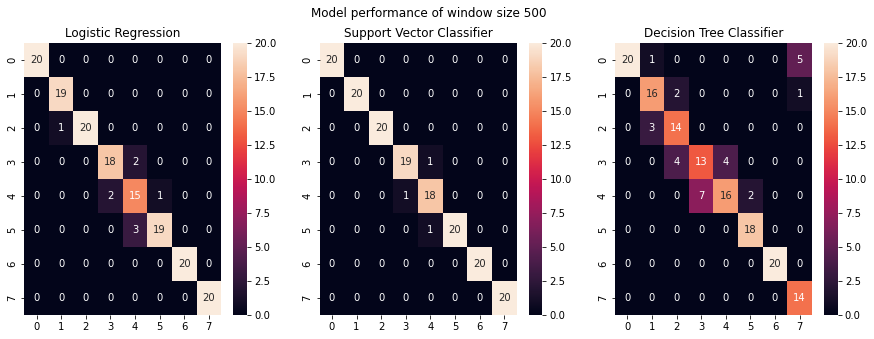

window size 500 accuracy
LM: 0.94375	svc: 0.98125	tree: 0.81875


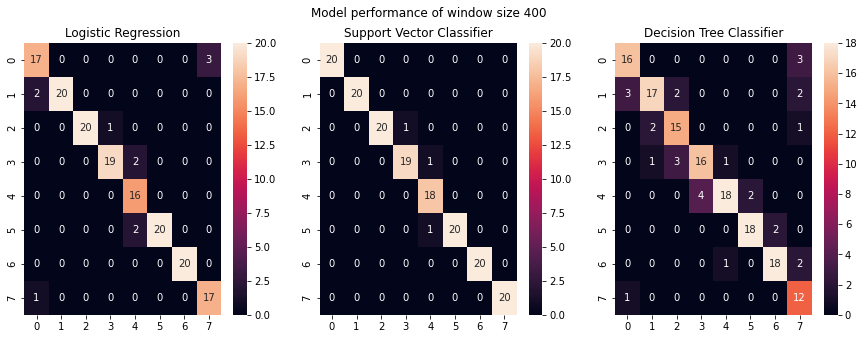

window size 400 accuracy
LM: 0.93125	svc: 0.98125	tree: 0.8125


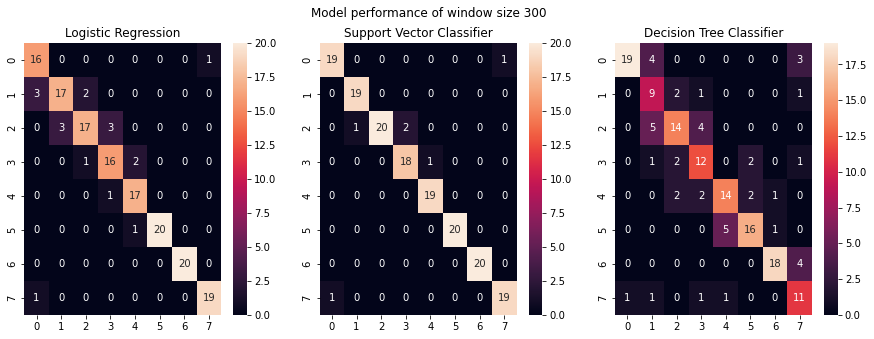

window size 300 accuracy
LM: 0.8875	svc: 0.9625	tree: 0.70625


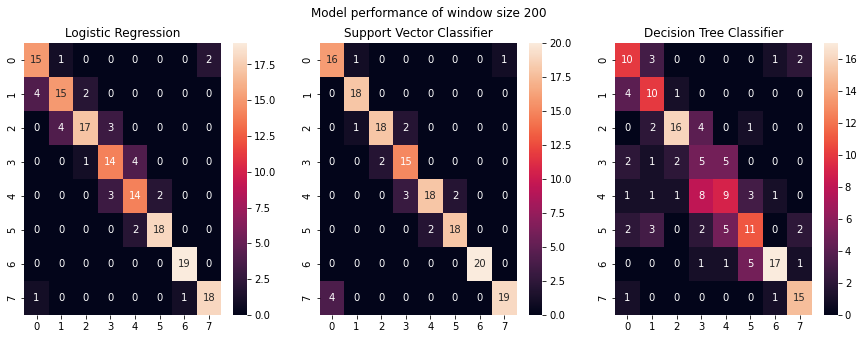

window size 200 accuracy
LM: 0.8125	svc: 0.8875	tree: 0.58125


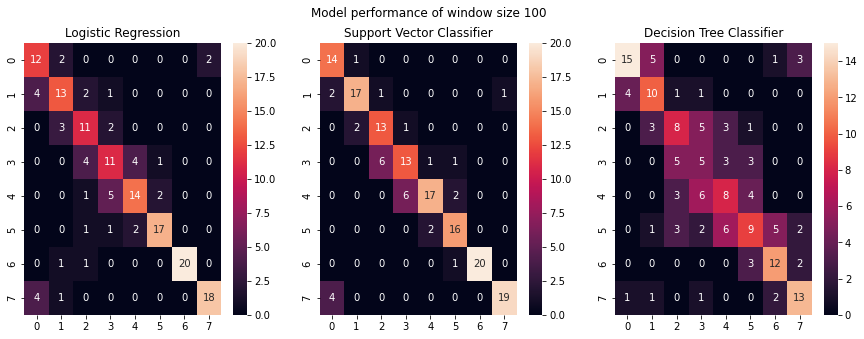

window size 100 accuracy
LM: 0.725	svc: 0.80625	tree: 0.5


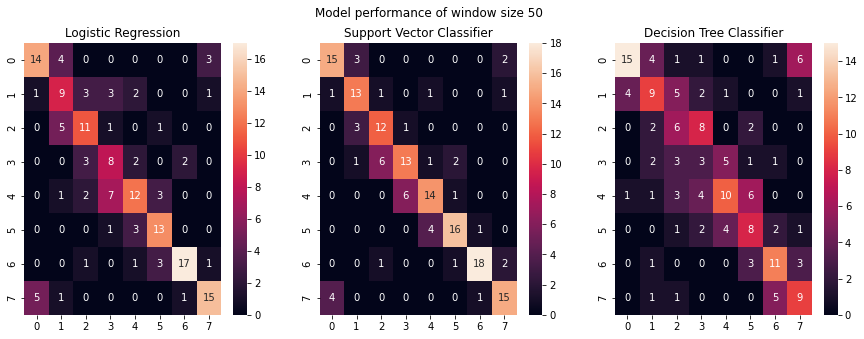

window size 50 accuracy
LM: 0.61875	svc: 0.725	tree: 0.44375


In [3]:
run(data)